# Analyzing Employee Exit Surveys
### Jake Lee

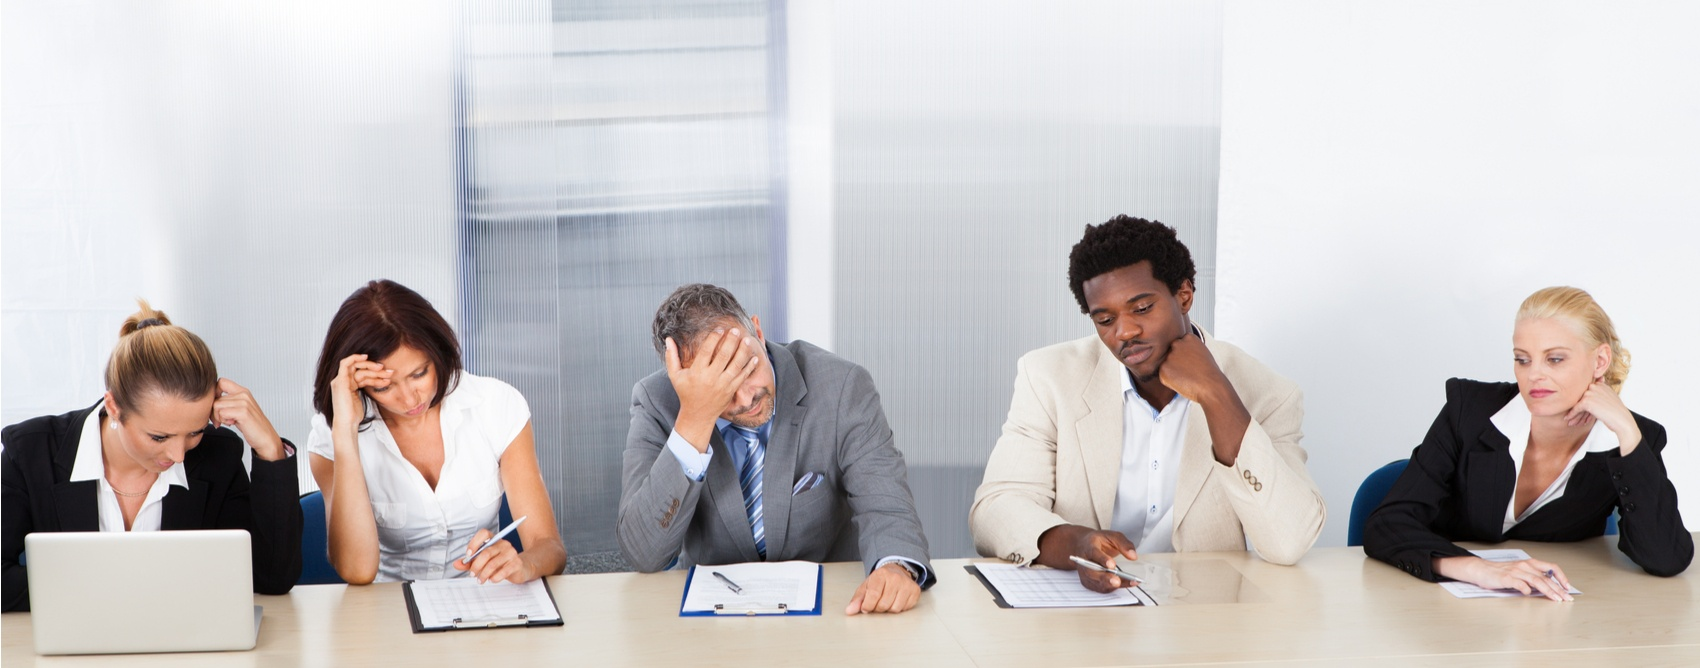

## Introduction
***
In this project we play the role of a data analyst seeking to please our stakeholders invested in two institutes: The Department of Education for Training and Employment (DETE) and Technical and Further Education (TAFE).

We pretend our Stakeholders want to know the following questions regarding employee retention:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

To answer these questions we will clean, merge, and analyze a set of employee survey datasets gathered by the institutes which we will refer to as `dete_survey` and `tafe_survey` datasets.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline


## Read in Data

In [2]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

## Explanatory Data Analysis (EDA)

In [3]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
# number of null values for each column
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
# drop columns with high null counts and low relevance
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
# standardize the column names to match with tafe
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

# show updated column names
dete_survey_updated.isnull().sum()

id                                       0
separationtype                           0
cease_date                              34
dete_start_date                         73
role_start_date                         98
position                                 5
classification                         367
region                                 105
business_unit                          696
employment_status                        5
career_move_to_public_sector             0
career_move_to_private_sector            0
interpersonal_conflicts                  0
job_dissatisfaction                      0
dissatisfaction_with_the_department      0
physical_work_environment                0
lack_of_recognition                      0
lack_of_job_security                     0
work_location                            0
employment_conditions                    0
maternity/family                         0
relocation                               0
study/travel                             0
ill_health 

`dete_survey` now has:
- relevant features
- standardized column names

Lets now move on to exploring `tafe_survey`

In [7]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [9]:
# drop columns with high null counts and low relevance
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
Contributing Factors. Career Move - Public Sector                            265
Contributing Factors. Career Move - Private Sector                           265
Contributing Factors. Career Move - Self-employment                          265
Contributing Factors. Ill Health                                             265
Contributing Factors. Maternity/Family                                       265
Contributing Factors. Dissatisfaction                                        265
Contributing Factors. Job Dissatisfaction                                    265
Contributing Factors. Interp

In [10]:
# standardize column names
col_map = {'Record ID':'id',
          'CESSATION YEAR':'cease_date',
          'Reason for ceasing employment':'separationtype',
          'Gender. What is your Gender?':'gender',
          'CurrentAge. Current Age':'age',
          'Employment Type. Employment Type':'employment_status',
          'Classification. Classification':'position', 
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
          'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(col_map, axis=1)
tafe_survey_updated.isnull().sum()


id                                                       0
Institute                                                0
WorkArea                                                 0
cease_date                                               7
separationtype                                           1
Contributing Factors. Career Move - Public Sector      265
Contributing Factors. Career Move - Private Sector     265
Contributing Factors. Career Move - Self-employment    265
Contributing Factors. Ill Health                       265
Contributing Factors. Maternity/Family                 265
Contributing Factors. Dissatisfaction                  265
Contributing Factors. Job Dissatisfaction              265
Contributing Factors. Interpersonal Conflict           265
Contributing Factors. Study                            265
Contributing Factors. Travel                           265
Contributing Factors. Other                            265
Contributing Factors. NONE                             2

`tafe_survey` now has:
- relevant features
- standardized column names

Lets observe what factors stand out in `separationtype` for each survey

In [11]:
dete_survey_updated["separationtype"].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [12]:
tafe_survey_updated["separationtype"].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

## Exploration Continued
***
Lets reduce our dataframes down to only respondents who have a resignation `separationtype` in order to discover factors causing employees to leave.

For `dete_survey` there are three types of Resignation:
- `Resignation-Other reasons`               
- `Resignation-Other employer`               
- `Resignation-Move overseas/interstate`

For `tafe_survey` there is only:
- `Resignation`

In [13]:
# reduce for dete dataframe
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') | (dete_survey_updated['separationtype'] == 'Resignation-Other employer') | (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')].copy()

# check
dete_resignations['separationtype'].value_counts()

separationtype
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: count, dtype: int64

In [14]:
#reduce for tafe dataframe
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# check
tafe_resignations['separationtype'].value_counts()                                                                                      

separationtype
Resignation    340
Name: count, dtype: int64

Now that our dataframes are sinificantly reduced, lets quickly check for inconsistent data by comparing start dates with `cease_date` and `date_resignations`.

In [15]:
# extract, standardize years
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r"([1-2][0-9]{3})")

# check
dete_resignations['cease_date'].value_counts()

cease_date
2013    146
2012    129
2014     22
2010      2
2006      1
Name: count, dtype: int64

In [16]:
# extract, standardize years 
dete_resignations['dete_start_date'].value_counts()

dete_start_date
2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1990.0     5
1997.0     5
1980.0     5
1993.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1983.0     2
1976.0     2
1974.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: count, dtype: int64

In [17]:
tafe_resignations['cease_date'].value_counts()

cease_date
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: count, dtype: int64

Lets use the valid dates to look at how employee's number of years of service factor into our overall questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Since `tafe_resignations` already has a column `institute_service`, lets create a matching column for dete_resignations.

In [18]:
# create new col 'institute service' by subracting start dates by end dates
dete_resignations["institute_service"] = dete_resignations["cease_date"].astype(float) - dete_resignations["dete_start_date"].astype(float)

# check and observe average years of service
dete_resignations["institute_service"].mean()

10.457875457875458

In [19]:
# compare means
tafe_resignations["institute_service"].value_counts()

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: count, dtype: int64

## Identifying Dissatisfied Employees
***
Now that we have a years of service column `institute_service`, we can move forward to identifying any employees who resigned because they were dissatisfied. 

From `tafe_survey_updated` we can analyze:
- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

From `dete_survey_updated` we can analyze:
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

If an employee marked any of these as `True`, we mark them as dissatisfied in a new column. First, lets get an overview on what factors are contributing to dissatisfaction most.

In [20]:
# overview on tafe dissatisfactions
tafe_dis_cols = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']

for i in tafe_dis_cols:
    print(tafe_resignations[i].value_counts(dropna=False), '\n')

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64 

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64 



In [21]:
# overview on dete dissatisfactions
dete_dis_cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition',
                 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']

for i in dete_dis_cols:
    print(dete_resignations[i].value_counts(dropna=False),'\n')

job_dissatisfaction
False    270
True      41
Name: count, dtype: int64 

dissatisfaction_with_the_department
False    282
True      29
Name: count, dtype: int64 

physical_work_environment
False    305
True       6
Name: count, dtype: int64 

lack_of_recognition
False    278
True      33
Name: count, dtype: int64 

lack_of_job_security
False    297
True      14
Name: count, dtype: int64 

work_location
False    293
True      18
Name: count, dtype: int64 

employment_conditions
False    288
True      23
Name: count, dtype: int64 

work_life_balance
False    243
True      68
Name: count, dtype: int64 

workload
False    284
True      27
Name: count, dtype: int64 



In [22]:
# formatting function for tafe
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
tafe_resignations[tafe_dis_cols] = tafe_resignations[tafe_dis_cols].applymap(update_vals)

# check updated overview
for i in tafe_dis_cols:
    print(tafe_resignations[i].value_counts(dropna=False), '\n')

Contributing Factors. Dissatisfaction
False    277
True      55
NaN        8
Name: count, dtype: int64 

Contributing Factors. Job Dissatisfaction
False    270
True      62
NaN        8
Name: count, dtype: int64 



With correct formatting, we can now move on to adding a new column `dissatisfied` for each dataframe. If any relating categories to job dissatisfaction are `True`, the new column will record True for each entry.

In [23]:
# create new column dissatisfied
dete_resignations['dissatisfied'] = dete_resignations[dete_dis_cols].any(axis=1,skipna=False)
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dis_cols].any(axis=1,skipna=False)

# create new dataframe to avoid SettingWithCopy Warning
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

# check
print("Dete Survey")
print(dete_resignations_up['dissatisfied'].value_counts(dropna=False), '\n')
print("Tafe Survey")
print(tafe_resignations_up['dissatisfied'].value_counts(dropna=False))                                                     

Dete Survey
dissatisfied
False    162
True     149
Name: count, dtype: int64 

Tafe Survey
dissatisfied
False    241
True      99
Name: count, dtype: int64


### Explanatory Recap
***
So far, we've done the following Exploratory steps:
- renamed our columns
- dropped irrelevant data
- verified the quality of our data
- created a new `institute_service` column
- cleaned the `contributing factors` columns
- created a new `dissatisfied` indication column

## Joining the Data
***
With clean, consistent, and relevant data we can move forward to joining our datasets.

In [24]:
# add distinguishing columns
dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"

# combine the data
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# drop unecessary columns
combined_updated = combined.dropna(thresh=500, axis=1)

# check
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    object 
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(1), object(8)
memory usage: 46.5+ KB


In [25]:
# observe the inconsistent years of service column
combined_updated['institute_service'].value_counts().head(10)

institute_service
Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
1.0                 22
7-10                21
3.0                 20
0.0                 20
Name: count, dtype: int64

Because we have so many different values in the `institute_service` column, we can batch them together categorically. We define the following based on the numner of years at a company criteria:
- New: less than 3 years
- Experienced: 3-6 years
- Established: 7-10 years
- Veteran: 11+ years

In [26]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str).str.extract('(\d+)').astype(float)
combined_updated['institute_service'].value_counts().head(10)

institute_service
1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
Name: count, dtype: int64

In [27]:
# function to categorize employees according to career level
def career_map(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val <6:
        return 'Experienced'
    elif 7 <= val < 10:
        return 'Established'
    else:
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_map)
combined_updated['service_cat'].value_counts()

service_cat
New            193
Veteran        159
Experienced    155
Established     56
Name: count, dtype: int64

With years of service grouped, lets standardize the age column and batch them into groups based on the following criteria:
- Young Adults ages 20-30 years
- Middle Aged Adults ages 31-45 years
- Older Adults ages 46-60
- Senior Adults ages 61+

In [28]:
combined_updated['age'].value_counts(dropna=False)

age
51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: count, dtype: int64

In [29]:
# convert to string, standardize
combined_updated['age_groups'] = combined_updated['age'].astype(str).str.replace('  ','-')

combined_updated['age_groups'].value_counts()

age_groups
41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
nan              55
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: count, dtype: int64

In [30]:
# batch into groups by age
young_age = ['20 or younger', '21-25','26-30']
middle_age = ['31-35','36-40','41-45']
older_age = ['46-50','51-55','56-60']
senior_age = ['56 or older', '61 or older']

def age_map(val):
    if pd.isnull(val):
        return np.nan
    elif val in young_age:
        return '16-30'
    elif val in middle_age:
        return '31-45'
    elif val in older_age:
        return '46-60'
    else:
        return '56+'
    
combined_updated['ages'] = combined_updated['age_groups'].apply(age_map)
combined_updated['ages'].value_counts()


ages
31-45    227
46-60    178
16-30    139
56+      107
Name: count, dtype: int64

Our data is now ready for analysis

## Analysis
***
Recall our stakeholders want to know the following:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In order to answer question 1, we'll analyze the `service_cat` column to understand if employment period is contributing to dissatisfaction.

For question 2, we'll look at the `institute_service` column to understand if certain age groups are more dissatified than others.

In [31]:
# average number of years
combined_updated['institute_service'].mean()

7.067495559502665

In [32]:
# average number of years employed Male
combined_updated[combined_updated['gender'] == 'Male']['institute_service'].mean()

7.285714285714286

In [33]:
# average number of years employed Female
combined_updated[combined_updated['gender'] == 'Female']['institute_service'].mean()

6.753148614609572

Not a significant difference in number of years employed between Male and Female genders.

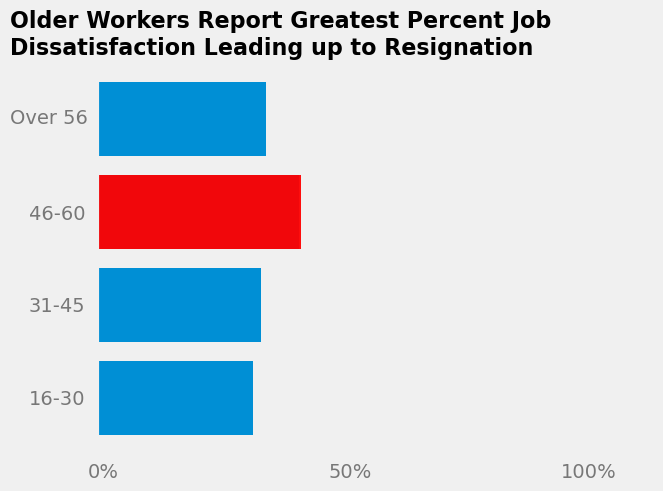

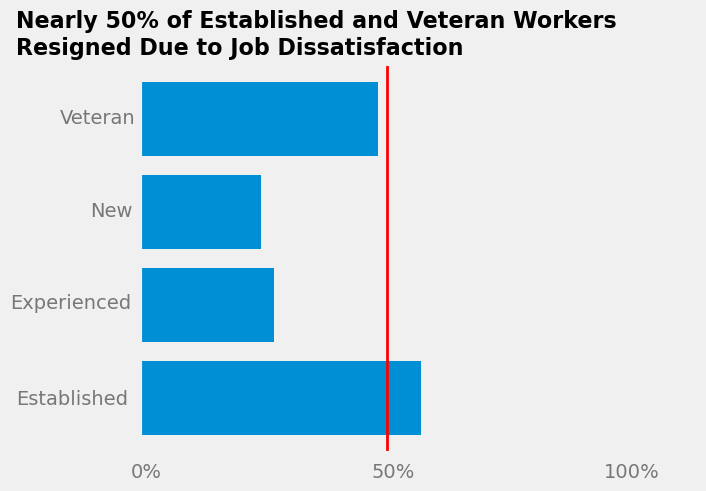

In [36]:
percent_dissatisfied_table_2 = combined_updated.pivot_table(values='dissatisfied', index='ages')

fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')

ax.barh(percent_dissatisfied_table_2.index, percent_dissatisfied_table_2['dissatisfied'])

# title
ax.text(-0.04,3.7,'Older Workers Report Greatest Percent Job\nDissatisfaction Leading up to Resignation',
        fontsize=16, fontweight='bold')

# rid grid
ax.grid(visible=False)

# x 
ax.set_xlim(0.1,1)
ax.set_xticklabels([])
ax.text(0.085, -0.85, '0%', alpha=0.5)
ax.text(0.475, -0.85, '50%', alpha=0.5)
ax.text(0.85, -0.85, '100%', alpha=0.5)

# y
ax.set_yticklabels([])
ax.text(-0.04, 2.95, 'Over 56', alpha=0.5)
ax.text(-0.01, 1.92, '46-60', alpha=0.5)
ax.text(-0.01, 0.93, '31-45', alpha=0.5)
ax.text(-0.01, -0.07, '16-30', alpha=0.5)

# hihglight 46-50
ax.add_patch(Rectangle((0, 1.6), 0.43, 0.8,alpha=0.95, facecolor='red', fill=True))

plt.show()

percent_dissatisfied_table = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
 
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')

ax.barh(percent_dissatisfied_table.index, percent_dissatisfied_table['dissatisfied'])

# title
ax.text(-0.1,3.7,'Nearly 50% of Established and Veteran Workers\nResigned Due to Job Dissatisfaction',
        fontsize=16, fontweight='bold')

# rid grid
ax.grid(visible=False)

# x
ax.set_xlim(0.1,1)

ax.set_xticklabels([])
ax.text(0.085, -0.85, '0%', alpha=0.5)
ax.text(0.475, -0.85, '50%', alpha=0.5)
ax.text(0.85, -0.85, '100%', alpha=0.5)

# y
ax.set_yticklabels([])
ax.text(-0.03, 2.95, 'Veteran', alpha=0.5)
ax.text(0.02, 1.95, 'New', alpha=0.5)
ax.text(-0.11, 0.97, 'Experienced', alpha=0.5)
ax.text(-0.1, -0.07, 'Established', alpha=0.5)

# 50 percent line
ax.axvline(0.5, linewidth=2, color='red')

plt.show()        

The charts reveal the following about employees who resigned:
- Nearly 30% were dissatisfied in some way
- Roughly 50 percent of Established (7-10 Years) and Veteran (11+ years) workers were dissatified in some way
- Rougly 35 percent of workers of all ages were dissatisfied in some way
- Over 40 percent of older aged (46-50 years old) workers were dissatisfied in some way

While age is not a significant factor in employee dissatisfaction, workers between the ages of 46-50 have reported the highest percentage of dissatisfaction. Workers who maintained 7 or more years of employment under a single business reported the highest percentage dissatisfaction.



## Conclusion for Stakeholders:
***
**Employees who have been with a company for seven or more years are more likely to resign due to job dissatisfaction. Specifically, our analysis showed that the highest percentage of dissatisfied employees were those with at least seven years of tenure. Notably, the average number of years worked by dissatisfied employees was also seven years, underscoring the significance of this threshold.**

Although there is not a strong correlation between employee age and job dissatisfaction, our analysis indicated that older workers are more likely to leave a company due to dissatisfaction.

To decreease job dissatisfaction we suggest deploying stronger employee retention strategies for employees who are both older aged and have been working at your company for longer. It is especially critical to focus on improving satisfaction for workers who are closing in on seven years of employment or more.

## Further Analysis:
***
If we were to continue this analysis on employee exits, we would want to analyze the factors leading to employee dissatisfaction. 

Some of those factors could include:
   - location (remote, in-person, etc.)
   - leadership influence
   - salary
   - job types
   - member of team(s)
   - growth opportunities
   - communication 